In [1]:
# import os
# cwd = os.getcwd()
# print("Current Working Directory:", cwd)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

#### Load the dataset

In [3]:
leads  = pd.read_excel("leads for take home assignment.xlsx")
leads.head(5)

,email,lead_status_for_campaign,campaign_id,campaign_city
0,user0@example.com,email_sent,camp_1,Denver
1,user1@example.com,email_sent,camp_2,Phoenix
2,user2@example.com,email_opened,camp_1,Denver
3,user3@example.com,email_opened,camp_1,Denver
4,user4@example.com,email_bounced,camp_1,Dallas


Check for null values and the shape

In [4]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   email                     210 non-null    object
 1   lead_status_for_campaign  210 non-null    object
 2   campaign_id               210 non-null    object
 3   campaign_city             210 non-null    object
dtypes: object(4)
memory usage: 6.7+ KB


In [5]:
leads.shape

(210, 4)

check for the number of unique values

In [6]:
leads.nunique()

email                       210
lead_status_for_campaign      5
campaign_id                   5
campaign_city                 3
dtype: int64

Check for duplicated rows

In [7]:
leads.duplicated().sum()

np.int64(0)

Check for the unique values

In [8]:
print("The unique values in campaign city is:", leads['campaign_city'].unique())
print("The unique values in campaign id is:", leads['campaign_id'].unique())
print("The unique values in lead status for campaign is:", leads['lead_status_for_campaign'].unique())

The unique values in campaign city is: ['Denver' 'Phoenix' 'Dallas']
The unique values in campaign id is: ['camp_1' 'camp_2' 'camp_5' 'camp_4' 'camp_3']
The unique values in lead status for campaign is: ['email_sent' 'email_opened' 'email_bounced' 'email_replied'
 'email_unsubscribed']


The email_sent value in the lead_status_campaign will be renamed email_unopened because that is a more accurate reflection of its status. Email sent is the count of email_sent, email_opened, email_bounced, email_replied, and email_unsubscribed.

In [9]:
leads['lead_status_for_campaign'] = leads['lead_status_for_campaign'].replace({'email_sent': 'email_unopened'})

In [10]:
#check if the replacement is done
print("The unique values in lead status for campaign is:", leads['lead_status_for_campaign'].unique())

The unique values in lead status for campaign is: ['email_unopened' 'email_opened' 'email_bounced' 'email_replied'
 'email_unsubscribed']


#### Univariate Analysis

Lead Status For Campaign

In [11]:
leads['lead_status_for_campaign'].value_counts()

lead_status_for_campaign
email_unopened        64
email_opened          63
email_bounced         41
email_replied         34
email_unsubscribed     8
Name: count, dtype: int64

In [12]:
print("Total number of emails sent is:", leads['lead_status_for_campaign'].count())
print("Of the 210 emails sent,", 
      (leads['lead_status_for_campaign'] == "email_opened").sum(), 
      "were opened", "which accounts for",
       (leads['lead_status_for_campaign'] == "email_opened").sum() / leads['lead_status_for_campaign'].count() * 100,
         "% of the total emails sent")

Total number of emails sent is: 210
Of the 210 emails sent, 63 were opened which accounts for 30.0 % of the total emails sent


In [13]:
print((leads['lead_status_for_campaign'] == "email_bounced").sum(), 
      "emails bounced", "which accounts for",
      f"{((leads['lead_status_for_campaign'] == "email_bounced").sum() / leads['lead_status_for_campaign'].count() * 100):.2f}",
      "% of the total emails sent")

41 emails bounced which accounts for 19.52 % of the total emails sent


In [14]:
print((leads['lead_status_for_campaign'] == "email_replied").sum(), 
      "emails were replied to", "which accounts for",
      f"{((leads['lead_status_for_campaign'] == "email_replied").sum() / leads['lead_status_for_campaign'].count() * 100):.2f}",
      "% of the total emails sent")

34 emails were replied to which accounts for 16.19 % of the total emails sent


The average Click-Through-Rate for any email marketing campaign is between 2-5%. Therefore, this email campaign can be said to be a success

In [15]:
print((leads['lead_status_for_campaign'] == "email_unsubscribed").sum(), 
      "potential clients unsubscribed from our email service.", "This accounts for",
      f"{((leads['lead_status_for_campaign'] == "email_unsubscribed").sum() / leads['lead_status_for_campaign'].count() * 100):.2f}",
      "% of individuals who got a mail from us.")

8 potential clients unsubscribed from our email service. This accounts for 3.81 % of individuals who got a mail from us.


CAMPAIGN_ID

In [16]:
campaign_counts = leads['campaign_id'].value_counts()
campaign_percentages = leads['campaign_id'].value_counts(normalize=True) * 100

campaign_summary = pd.DataFrame({
    'count': campaign_counts,
    'percentage (%)': campaign_percentages.round(2)
})

print(campaign_summary)


             count  percentage (%)
campaign_id                       
camp_2          50           23.81
camp_5          46           21.90
camp_3          40           19.05
camp_1          38           18.10
camp_4          36           17.14


More emails were sent from camp 2 compared to other camps

CAMPAIGN CITY

In [17]:
city_count = leads['campaign_city'].value_counts()
city_percentage = leads['campaign_city'].value_counts(normalize=True) * 100

city_campaign_summary = pd.DataFrame({
    'count': city_count,
    'percentage(%)': city_percentage.round(2)
})

print(city_campaign_summary)

               count  percentage(%)
campaign_city                      
Dallas            73          34.76
Phoenix           69          32.86
Denver            68          32.38


The city of Dallas is the major recipient of emails from the campaign

#### BIVARIATE ANALYSIS

compare email status by city and camp

In [18]:
city_status = leads.groupby('campaign_city')['lead_status_for_campaign'].value_counts()
print(city_status)

campaign_city  lead_status_for_campaign
Dallas         email_bounced               37
               email_opened                15
               email_unopened              11
               email_replied                9
               email_unsubscribed           1
Denver         email_unopened              28
               email_opened                26
               email_replied               12
               email_bounced                2
Phoenix        email_unopened              25
               email_opened                22
               email_replied               13
               email_unsubscribed           7
               email_bounced                2
Name: count, dtype: int64


In [19]:
leads.groupby('campaign_id')['lead_status_for_campaign'].value_counts()

campaign_id  lead_status_for_campaign
camp_1       email_unopened              13
             email_replied               10
             email_opened                 8
             email_bounced                6
             email_unsubscribed           1
camp_2       email_opened                17
             email_bounced               13
             email_unopened              13
             email_replied                5
             email_unsubscribed           2
camp_3       email_opened                12
             email_unopened              11
             email_bounced                8
             email_replied                6
             email_unsubscribed           3
camp_4       email_opened                12
             email_unopened               9
             email_bounced                8
             email_replied                6
             email_unsubscribed           1
camp_5       email_unopened              18
             email_opened             

In [20]:
leads.groupby('campaign_city')['lead_status_for_campaign'].value_counts(normalize=True).mul(100).round(2).rename('percentage').reset_index()

,campaign_city,lead_status_for_campaign,percentage
0,Dallas,email_bounced,50.68
1,Dallas,email_opened,20.55
2,Dallas,email_unopened,15.07
3,Dallas,email_replied,12.33
4,Dallas,email_unsubscribed,1.37
5,Denver,email_unopened,41.18
6,Denver,email_opened,38.24
7,Denver,email_replied,17.65
8,Denver,email_bounced,2.94
9,Phoenix,email_unopened,36.23


Dallas has a very high bounce rate, with over 50% of emails bounced, compared to the 2.9% bounce rate in Denver and Phoenix

In [21]:
leads.groupby('campaign_id')['lead_status_for_campaign'].value_counts(normalize=True)\
    .mul(100)\
        .round(2)\
            .rename('percentage')\
                .reset_index()

,campaign_id,lead_status_for_campaign,percentage
0,camp_1,email_unopened,34.21
1,camp_1,email_replied,26.32
2,camp_1,email_opened,21.05
3,camp_1,email_bounced,15.79
4,camp_1,email_unsubscribed,2.63
5,camp_2,email_opened,34.00
6,camp_2,email_bounced,26.00
7,camp_2,email_unopened,26.00
8,camp_2,email_replied,10.00
9,camp_2,email_unsubscribed,4.00


In [22]:
leads.groupby('campaign_city')['campaign_id'].value_counts()

campaign_city  campaign_id
Dallas         camp_2         21
               camp_4         16
               camp_5         14
               camp_3         12
               camp_1         10
Denver         camp_1         17
               camp_5         15
               camp_3         14
               camp_2         11
               camp_4         11
Phoenix        camp_2         18
               camp_5         17
               camp_3         14
               camp_1         11
               camp_4          9
Name: count, dtype: int64

Camp_1 seems to be the most effective has it has the highest Click-Through-Rate. However, camp_2 has the highest bounce rate.

It might be noteworthy that camp_2 campaign was highest in Dallas. Although it was also high in Phoenix, but phoenix has a low bounce rate.

#### MULTIVARIATE ANALYSIS

In [23]:
leads[leads['campaign_city'] == 'Denver'].groupby(['campaign_city', 'campaign_id'])['lead_status_for_campaign']\
    .value_counts(normalize=True)\
        .mul(100)\
            .round(2)\
                .rename('percentage')\
                    .reset_index()

,campaign_city,campaign_id,lead_status_for_campaign,percentage
0,Denver,camp_1,email_unopened,41.18
1,Denver,camp_1,email_opened,35.29
2,Denver,camp_1,email_replied,23.53
3,Denver,camp_2,email_opened,36.36
4,Denver,camp_2,email_unopened,36.36
5,Denver,camp_2,email_bounced,18.18
6,Denver,camp_2,email_replied,9.09
7,Denver,camp_3,email_opened,42.86
8,Denver,camp_3,email_replied,28.57
9,Denver,camp_3,email_unopened,28.57


Lets break the above down by city for easy readability.

From the breakdown, it is clear that camp_1 has consistently maintained a high CTR. Only in Denver did camp_1 come in a close second for the highest CTR.

In [24]:
leads[leads['campaign_city'] == 'Denver'] \
    .groupby(['campaign_city', 'campaign_id'])['lead_status_for_campaign'] \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .rename('percentage') \
    .reset_index() \
    .pivot(index=['campaign_city', 'campaign_id'], columns='lead_status_for_campaign', values='percentage') \
    .fillna(0)


lead_status_for_campaign   email_bounced  email_opened  email_replied  \
campaign_city campaign_id                                               
Denver        camp_1                0.00         35.29          23.53   
              camp_2               18.18         36.36           9.09   
              camp_3                0.00         42.86          28.57   
              camp_4                0.00         36.36          18.18   
              camp_5                0.00         40.00           6.67   

lead_status_for_campaign   email_unopened  
campaign_city campaign_id                  
Denver        camp_1                41.18  
              camp_2                36.36  
              camp_3                28.57  
              camp_4                45.45  
              camp_5                53.33

In [25]:
leads[leads['campaign_city'] == 'Phoenix'] \
    .groupby(['campaign_city', 'campaign_id'])['lead_status_for_campaign'] \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .rename('percentage') \
    .reset_index() \
    .pivot(index=['campaign_city', 'campaign_id'], columns='lead_status_for_campaign', values='percentage') \
    .fillna(0)

lead_status_for_campaign   email_bounced  email_opened  email_replied  \
campaign_city campaign_id                                               
Phoenix       camp_1                0.00          9.09          36.36   
              camp_2               11.11         44.44           5.56   
              camp_3                0.00         28.57          14.29   
              camp_4                0.00         55.56          22.22   
              camp_5                0.00         23.53          23.53   

lead_status_for_campaign   email_unopened  email_unsubscribed  
campaign_city campaign_id                                      
Phoenix       camp_1                45.45                9.09  
              camp_2                27.78               11.11  
              camp_3                35.71               21.43  
              camp_4                22.22                0.00  
              camp_5                47.06                5.88

In [26]:
leads[leads['campaign_city'] == 'Dallas'] \
    .groupby(['campaign_city', 'campaign_id'])['lead_status_for_campaign'] \
    .value_counts(normalize=True) \
    .mul(100).round(2) \
    .rename('percentage') \
    .reset_index() \
    .pivot(index=['campaign_city', 'campaign_id'], columns='lead_status_for_campaign', values='percentage') \
    .fillna(0)

lead_status_for_campaign   email_bounced  email_opened  email_replied  \
campaign_city campaign_id                                               
Dallas        camp_1               60.00         10.00          20.00   
              camp_2               42.86         23.81          14.29   
              camp_3               66.67         16.67           0.00   
              camp_4               50.00         18.75          12.50   
              camp_5               42.86         28.57          14.29   

lead_status_for_campaign   email_unopened  email_unsubscribed  
campaign_city campaign_id                                      
Dallas        camp_1                10.00                0.00  
              camp_2                19.05                0.00  
              camp_3                16.67                0.00  
              camp_4                12.50                6.25  
              camp_5                14.29                0.00

#### VISUALIZATION

Email Volume by City

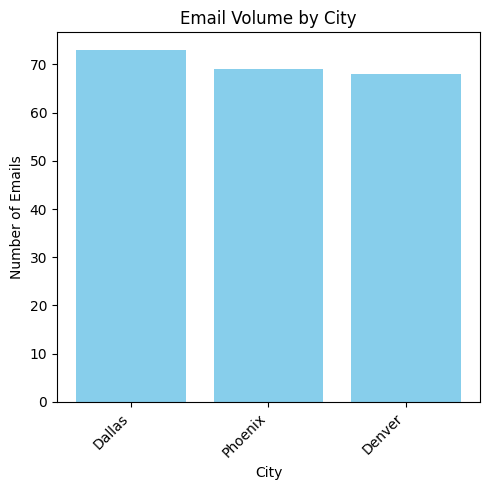

In [33]:
city_counts = leads['campaign_city'].value_counts().reset_index()
city_counts.columns = ['City', 'Email Count']

# Plot
plt.figure(figsize=(5, 5))
plt.bar(city_counts['City'], city_counts['Email Count'], color='skyblue')

# Add titles and labels
plt.title('Email Volume by City')
plt.xlabel('City')
plt.ylabel('Number of Emails')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


Email Volume by Campaign

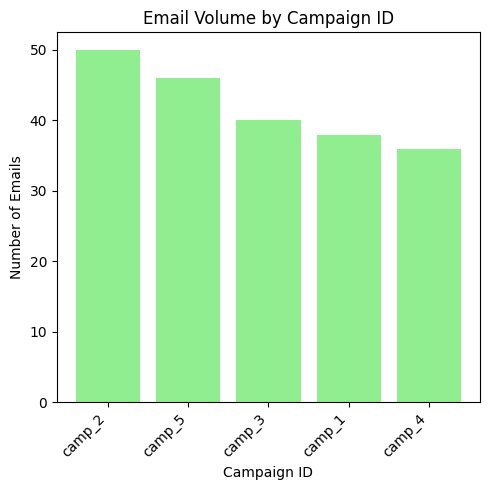

In [34]:
campaign_counts = leads['campaign_id'].value_counts().reset_index()
campaign_counts.columns = ['Campaign ID', 'Email Count']

# Plot
plt.figure(figsize=(5, 5))
plt.bar(campaign_counts['Campaign ID'], campaign_counts['Email Count'], color='lightgreen')

# Add titles and labels
plt.title('Email Volume by Campaign ID')
plt.xlabel('Campaign ID')
plt.ylabel('Number of Emails')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


Lead Status by Campaign ID

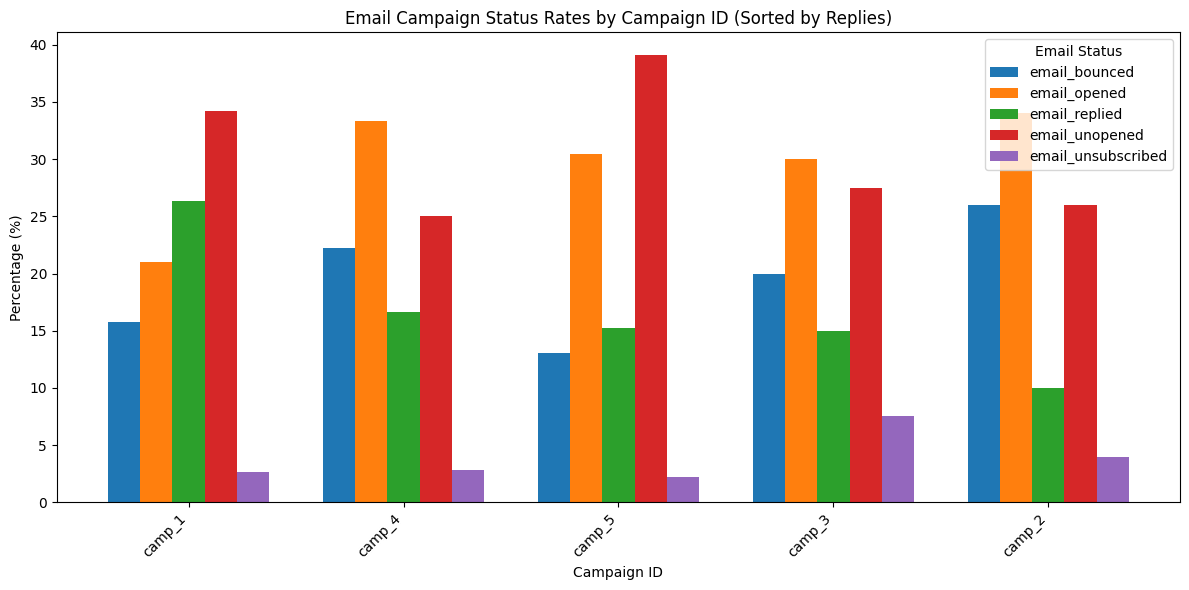

In [35]:
statuses = [
    'email_unopened',
    'email_opened',
    'email_bounced',
    'email_replied',
    'email_unsubscribed'
]

# Step 2: Filter relevant rows
leads_filtered = leads[leads['lead_status_for_campaign'].isin(statuses)]

# Step 3: Count of each status per campaign_id
status_counts = (
    leads_filtered
    .groupby(['campaign_id', 'lead_status_for_campaign'])
    .size()
    .reset_index(name='count')
)

# Step 4: Total leads per campaign_id
total_counts = (
    leads.groupby('campaign_id')
    .size()
    .reset_index(name='total')
)

# Step 5: Merge and calculate percentage
status_counts = status_counts.merge(total_counts, on='campaign_id')
status_counts['percentage'] = (status_counts['count'] / status_counts['total'] * 100).round(2)

# Step 6: Sort campaign_id based on email_replied percentage
reply_order = (
    status_counts[status_counts['lead_status_for_campaign'] == 'email_replied']
    .sort_values('percentage', ascending=False)['campaign_id']
)

# Step 7: Set campaign_id as ordered categorical for sorting
status_counts['campaign_id'] = pd.Categorical(
    status_counts['campaign_id'],
    categories=reply_order,
    ordered=True
)

# Step 8: Pivot the data for grouped bar plotting
pivot_df = status_counts.pivot(index='campaign_id', columns='lead_status_for_campaign', values='percentage').fillna(0)
pivot_df = pivot_df.loc[reply_order]  # Apply sorting

# Step 9: Plot grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.15
x = range(len(pivot_df))

# Plot each status as a separate bar group
for i, status in enumerate(pivot_df.columns):
    plt.bar(
        [xi + i * bar_width for xi in x],
        pivot_df[status],
        width=bar_width,
        label=status
    )

# Axis and labels
plt.xticks([xi + bar_width * (len(pivot_df.columns) / 2 - 0.5) for xi in x], pivot_df.index, rotation=45, ha='right')
plt.xlabel('Campaign ID')
plt.ylabel('Percentage (%)')
plt.title('Email Campaign Status Rates by Campaign ID (Sorted by Replies)')
plt.legend(title='Email Status')

plt.tight_layout()
plt.show()


Lead Status by City

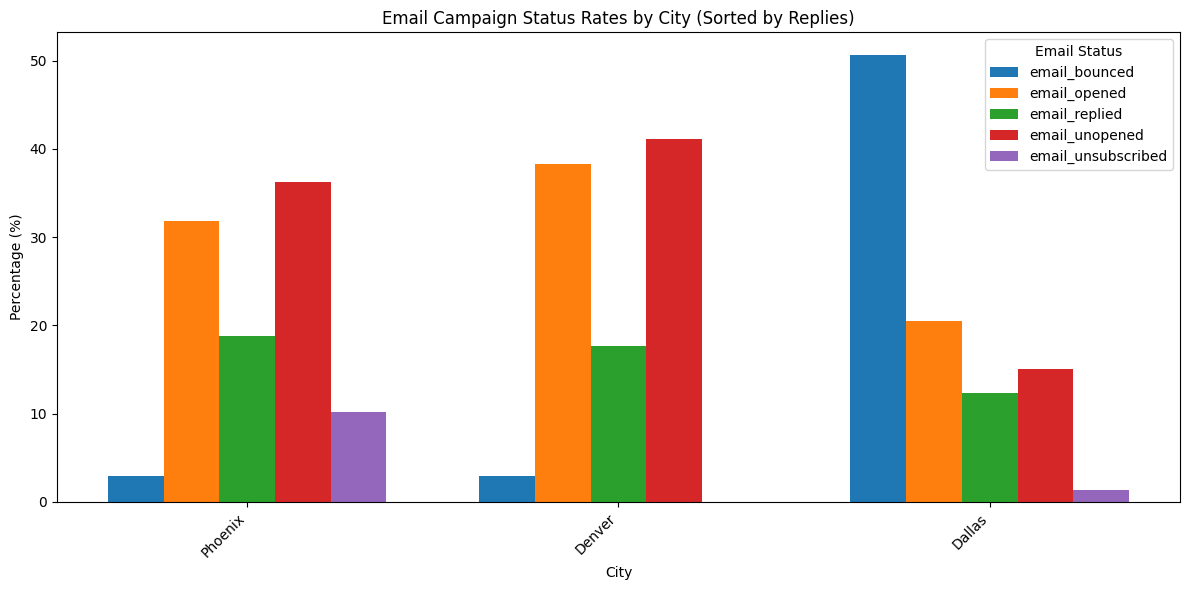

In [36]:
# Step 1: Define relevant statuses
statuses = [
    'email_unopened',
    'email_opened',
    'email_bounced',
    'email_replied',
    'email_unsubscribed'
]

# Step 2: Filter relevant rows
leads_filtered = leads[leads['lead_status_for_campaign'].isin(statuses)]

# Step 3: Count of each status per city
status_counts = (
    leads_filtered
    .groupby(['campaign_city', 'lead_status_for_campaign'])
    .size()
    .reset_index(name='count')
)

# Step 4: Total leads per city
total_counts = (
    leads.groupby('campaign_city')
    .size()
    .reset_index(name='total')
)

# Step 5: Merge and calculate percentage
status_counts = status_counts.merge(total_counts, on='campaign_city')
status_counts['percentage'] = (status_counts['count'] / status_counts['total'] * 100).round(2)

# Step 6: Sort cities by email_replied percentage
city_order = (
    status_counts[status_counts['lead_status_for_campaign'] == 'email_replied']
    .sort_values('percentage', ascending=False)['campaign_city']
)

# Step 7: Set city order
status_counts['campaign_city'] = pd.Categorical(
    status_counts['campaign_city'],
    categories=city_order,
    ordered=True
)

# Step 8: Pivot the data
pivot_df = status_counts.pivot(index='campaign_city', columns='lead_status_for_campaign', values='percentage').fillna(0)
pivot_df = pivot_df.loc[city_order]  # Apply sorting

# Step 9: Plot grouped bar chart
plt.figure(figsize=(12, 6))
bar_width = 0.15
x = range(len(pivot_df))

# Plot each status
for i, status in enumerate(pivot_df.columns):
    plt.bar(
        [xi + i * bar_width for xi in x],
        pivot_df[status],
        width=bar_width,
        label=status
    )

# Axis and labels
plt.xticks([xi + bar_width * (len(pivot_df.columns) / 2 - 0.5) for xi in x],
           pivot_df.index, rotation=45, ha='right')
plt.xlabel('City')
plt.ylabel('Percentage (%)')
plt.title('Email Campaign Status Rates by City (Sorted by Replies)')
plt.legend(title='Email Status')

plt.tight_layout()
plt.show()
